In [54]:
from IPython.core import display
from io import BytesIO
import Image
import numpy as np
import random
import os
import neurolab as nl
from matplotlib import pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [2]:
os.chdir("..")
%pwd

u'/home/joe/Documents/pycode/compOpt_Project'

In [74]:
def getData(path):
    "Splits the data into X and y both being numpy arrays (data already normalized)"
    f = open(path)
    lines = f.readlines()
    f.close
    
    images = []
    classification = []
    for line in lines:
        nums = line.split()
        classification.append(nums[0])
        images.append([((float (val))) for val in nums[1:]])
    return (np.array(classification),np.array(images))

def display_grayscale(arr):
    "SIDE EFFECTS: INTENDED TO BE USED IN IPYTHON NOTEBOOK"
    img = arr.astype('uint8').reshape((16,16))
    plt.imshow(img, cmap = cm.Greys_r)
    return Image.fromarray(img)

In [75]:
classification,trainData = getData("ZipDigits.train.txt")

In [13]:
# Create network with 256 inputs, 2 neurons in hidden layer
# And 256 in output layer
testData = trainData[:101]
inputParams = [[-1, 1]] * len(trainData[0])
ann = nl.net.newff(inputParams, [2, 256])

# Train process
err = ann.train(testData, testData,epochs=500,show=1)

test = ann.sim(testData)

Epoch: 1; Error: 23475.4413954;
Epoch: 2; Error: 23435.1892652;
Epoch: 3; Error: 23399.4916893;
Epoch: 4; Error: 23346.3119994;
Epoch: 5; Error: 23320.8692582;
Epoch: 6; Error: 23280.8964553;
Epoch: 7; Error: 23222.2929486;
Epoch: 8; Error: 23192.5063058;
Epoch: 9; Error: 23128.5944609;
Epoch: 10; Error: 23047.2205091;
Epoch: 11; Error: 23018.5346716;
Epoch: 12; Error: 22977.9594226;
Epoch: 13; Error: 22975.9505312;
Epoch: 14; Error: 22972.1186142;
Epoch: 15; Error: 22937.480171;
Epoch: 16; Error: 22926.5675251;
Epoch: 17; Error: 22919.960251;
Epoch: 18; Error: 22911.6175247;
Epoch: 19; Error: 22906.5873484;
Epoch: 20; Error: 22899.9630601;
Epoch: 21; Error: 22893.2793938;
Epoch: 22; Error: 22887.072306;
Epoch: 23; Error: 22877.7712529;
Epoch: 24; Error: 22868.0210923;
Epoch: 25; Error: 22857.6492208;
Epoch: 26; Error: 22853.6127314;
Epoch: 27; Error: 22846.5414385;
Epoch: 28; Error: 22831.7247641;
Epoch: 29; Error: 22826.8392122;
Epoch: 30; Error: 22796.6370578;
Epoch: 31; Error: 2278

In [64]:
print trainData[0][8]
print test[0][8]

0.862
0


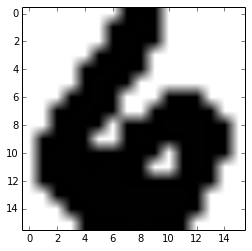

In [76]:
example = display_grayscale(trainData[0])

example.save('example.png')